### Data Wrangling with Python: Activity 5, page 116

In [1]:
#loading necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import pyspark
import numpy as np

Check the first 10 records. Find the total number of records.

In [2]:
#Read in the Boston Housing dataset
boston_df = pd.read_csv("BostonHousing.csv")
#View first 10 rows
boston_df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
#Total number of records

#Retrieve indices of the dataframe
index = boston_df.index
#Length of the indices = number of records
num_rows = len(index)
print("Number of records: ", num_rows)

Number of records:  506


Create a smaller DataFrame with columns that do not include CHAS, NOX, B, and LSTAT.Check the last seven records of the new DataFrame you just created.

In [4]:
#dropping columns CHAS, NOX, B and LSTAT
#1 = columns
boston_sub = boston_df.drop(['chas','nox','b','lstat'],1)

#last seven records of new dataframe
#tail function to get records starting from end of dataframe
boston_sub.tail(7)

,crim,zn,indus,rm,age,dis,rad,tax,ptratio,medv
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


Plot the histograms of all the variables in the new DataFrame.

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>],
       [<AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>],
       [<AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

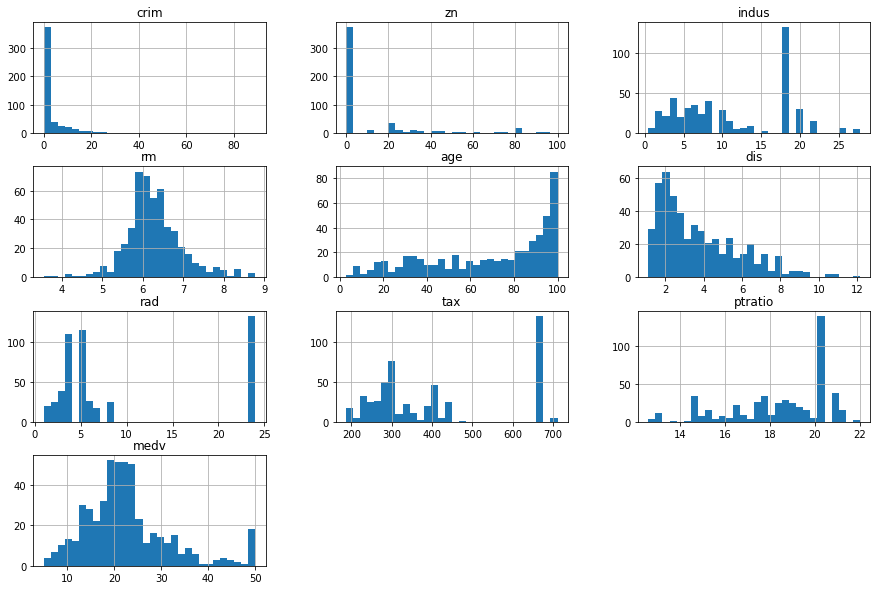

In [5]:
#plotting a histogram for each numerical attribute in the new dataframe
boston_sub.hist(bins=30, figsize=(15, 10))

Plot them all at once using a for loop. Try to add an unique title to a plot.

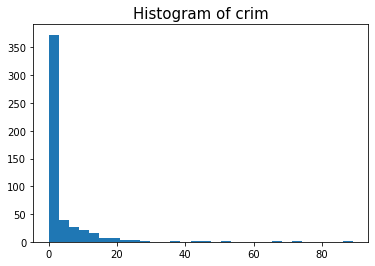

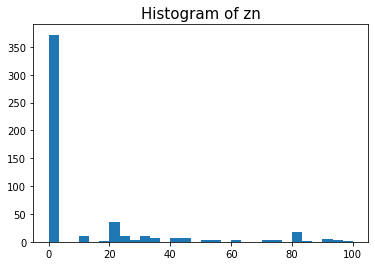

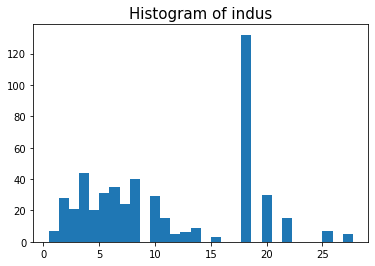

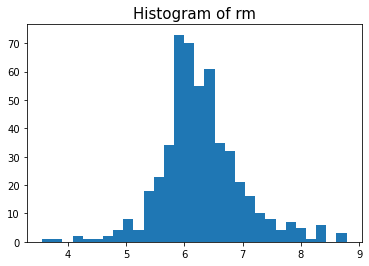

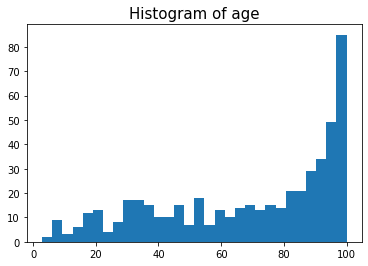

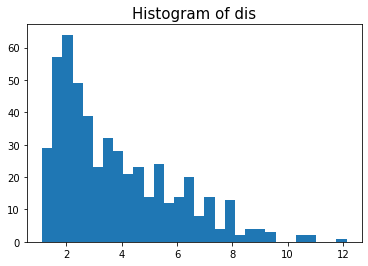

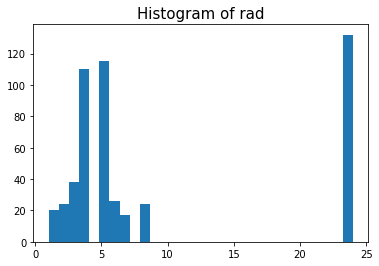

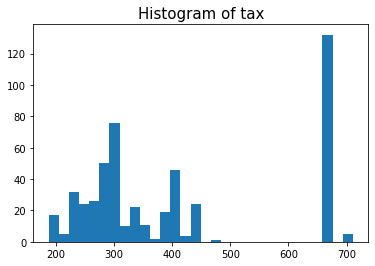

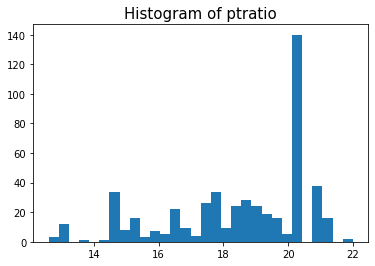

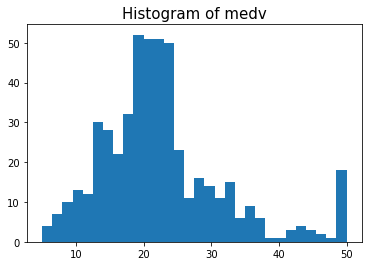

In [6]:
#for loop for creating histograms for each column in new dataframe
for col in boston_sub.columns:
    plt.title("Histogram of "+col,fontsize=15)
    plt.hist(boston_sub[col],bins=30)
    plt.show()

Create a scatter plot of crime rate versus price.

- Crime rate: 'crim'
- Price: 'medv'

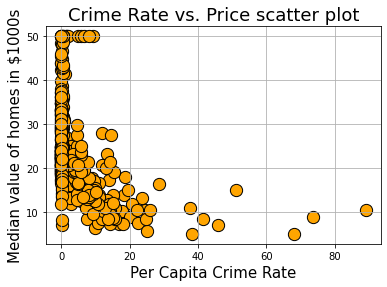

In [7]:
#scatter plot for crime rate vs. price
boston_sub.plot.scatter('crim','medv',s=150,c='orange',edgecolor='k')
plt.grid(True)
plt.title('Crime Rate vs. Price scatter plot',fontsize=18)
plt.xlabel('Per Capita Crime Rate',fontsize=15)
plt.ylabel('Median value of homes in $1000s',fontsize=15)
plt.show()

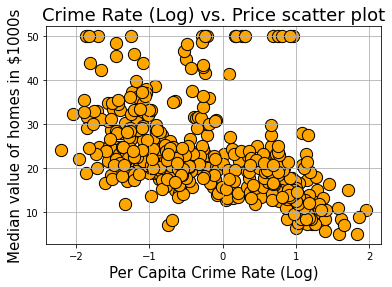

In [8]:
#Plot using log10(crime) versus price
boston_sub['log10_crime'] = np.log10(boston_sub['crim'])
boston_sub.plot.scatter('log10_crime','medv',s=150,c='orange',edgecolor='k')
plt.grid(True)
plt.title('Crime Rate (Log) vs. Price scatter plot',fontsize=18)
plt.xlabel('Per Capita Crime Rate (Log)',fontsize=15)
plt.ylabel('Median value of homes in $1000s',fontsize=15)
plt.show()

Calculate some useful statistics such as mean rooms per dwelling, median age, mean distances to five Boston employment centers, and the percentage of houses with a low price < $20,000.

In [9]:
#'rm' column = average number of rooms per dwelling
#rounded to nearest whole room
mean_rooms = round(boston_sub['rm'].mean(),0)
print('Mean rooms per dwelling: ', mean_rooms)

Mean rooms per dwelling:  6.0


In [10]:
#median age
#AGE - proportion of owner-occupied units built prior to 1940
med_age = boston_sub['age'].median()
print('Median age: ',med_age)

Median age:  77.5


In [11]:
#mean distances to five Boston employment centers
#DIS - weighted distances to five Boston employment centres
mean_dis = round(boston_sub['dis'].mean(),3)
print('Mean distance to 5 Boston employment centers: ',mean_dis)

Mean distance to 5 Boston employment centers:  3.795


In [12]:
# Create a Pandas series and directly compare it with 20 since values are in 1000's
low_price=boston_sub['medv']<20
# Boolean array of True, False
print(low_price)
# Take average to find number of 1's or Trues
# convert into percentage by multiplying with 100
pcnt=low_price.mean()*100
print("\nPercentage of house with <20,000 price is: ",round(pcnt,2))

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505     True
Name: medv, Length: 506, dtype: bool

Percentage of house with <20,000 price is:  41.5


### Data Wrangling with Python: Activity 6, page 171

In [13]:
#necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
#Read in adult income dataset
#no header column -- otherwise first row is assigned as column names
adult_income = pd.read_csv("adult_data.csv",header=None)
adult_income.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Create a script that will read the adult.txt file line by line.

In [15]:
columns = []
#open adult.names text file
with open('adult.txt','r') as adult:
    for line in adult:
        #read line from file
        adult.readline()
        #split column name from description at ':'
        col=line.split(":")[0]
        #append column to names list
        columns.append(col)
        
print(columns)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


Add a name of Income for the response variable to the dataset.

In [16]:
#adding 'Income' to the columns list
columns.append('Income')

In [17]:
adult_income = pd.read_csv("adult_data.csv",names=columns)
adult_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Find the missing values.

In [18]:
#using isnull() function to find missing values
#sum will help us see number of missing values in each column if any were found
print('Count of total missing values: \n\n',adult_income.isnull().sum())

#no missing values!

Count of total missing values: 

 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64


Create a DataFrame with only age, education and occupation by using subsetting.

In [19]:
#only selecting columns age, education and occupation from the original dataframe
adult_subset = adult_income[['age','education','occupation']]
adult_subset.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


Plot a histogram of age with a bin size of 20.

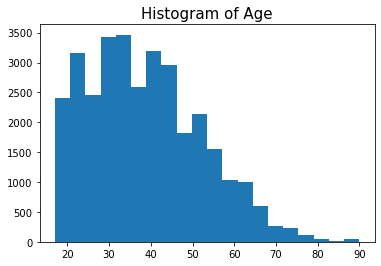

In [20]:
plt.title("Histogram of Age",fontsize=15)
plt.hist(adult_subset['age'],bins=20)
plt.show()

Create a function to strip the whitespace characters.

In [21]:
#function that replaces whitespace with no space ""
def strip_space(str):
    return str.replace(" ","")

Use the apply method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column.

In [22]:
#not done on age column since it's numeric

# Education column
#apply function on old column to make new column -- strip all white space
adult_subset['education_stripped']=adult_income['education'].apply(strip_space)
#copy new column to old column
adult_subset['education']=adult_subset['education_stripped']
#drop new column without creating new dataframe, inplace=True
adult_subset.drop(labels=['education_stripped'],axis=1,inplace=True)

# Occupation column
adult_subset['occupation_stripped']=adult_income['occupation'].apply(strip_space)
adult_subset['occupation']=adult_subset['occupation_stripped']
adult_subset.drop(labels=['occupation_stripped'],axis=1,inplace=True)

<ipython-input-22-02b67533534c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_subset['education_stripped']=adult_income['education'].apply(strip_space)
<ipython-input-22-02b67533534c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_subset['education']=adult_subset['education_stripped']
C:\Users\phill\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

Find the number of people who are aged between 30 and 50.

In [23]:
#building dataframe only with people aged between 30 and 50 (inclusive of both values)
age_df = adult_subset.loc[(adult_subset['age'] >=30) & (adult_subset['age'] <= 50)]
#finding number of rows/people in new dataset
print("Number of people aged between 30 and 50: ",len(age_df.index))

Number of people aged between 30 and 50:  16390


Group the records based on age and education to find how the mean age is distributed.

In [24]:
#grouping on education to find the mean age in each education group
adult_subset.groupby(['education'])['age'].mean()

education
10th            37.429796
11th            32.355745
12th            32.000000
1st-4th         46.142857
5th-6th         42.885886
7th-8th         48.445820
9th             41.060311
Assoc-acdm      37.381443
Assoc-voc       38.553546
Bachelors       38.904949
Doctorate       47.702179
HS-grad         38.974479
Masters         44.049913
Preschool       42.764706
Prof-school     44.746528
Some-college    35.756275
Name: age, dtype: float64

Group by occupation and show the summary statistics of age. Find which profession has the oldest workers on average and which profession has its largest share of the workforce above the 75th percentile.

In [25]:
#grouping by occupation
#using describe on age numeric to get summary statistics
adult_subset.groupby(['occupation'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


#### Profession with oldest workers on average: Exec-managerial

#### Profession with largest share of workforce above the 75th percentile: ?

Use subset and group by to find outliers.

In [26]:
#summary statistics of age by occupation grouping -- need to use category
occupation_stats= adult_subset.groupby('occupation').describe()['age']

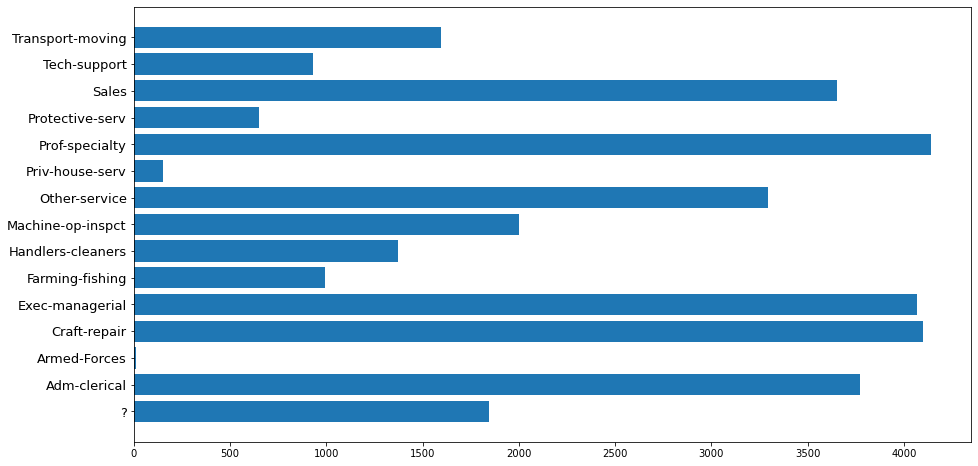

In [27]:
#plotting the values on a bar chart
plt.figure(figsize=(15,8))
plt.barh(y=occupation_stats.index,width=occupation_stats['count'])
plt.yticks(fontsize=13)
plt.show()

- Armed-Forces & Priv-house serve have very small counts in comparison to the other bars/categories -- potential outliers
- Armed Forces is a much bigger difference though (count of 9), Priv-house serve has a count of 149 which is at least closer to the other counts than 9

Merge the data using common keys.

In [28]:
#one dataset for merging
#subset with age, marital status and occupation
#sample 5 rows -- random pull
df_1 = adult_income[['age','marital-status','occupation']].sample(5,random_state=101)

In [29]:
#second dataset for merging
#subset with hours per week, education, and occupation
#sample 5 rows
df_2 = adult_income[['hours-per-week','education','occupation']].sample(5,random_state=101)

In [30]:
#merging df_1 and df_2 on 'occupation' common key
df_merge = pd.merge(df_1,df_2,on='occupation',how='inner').drop_duplicates()

In [31]:
df_merge

,age,marital-status,occupation,hours-per-week,education
0,51,Married-civ-spouse,Machine-op-inspct,40,HS-grad
1,19,Never-married,Sales,30,11th
2,40,Married-civ-spouse,Exec-managerial,40,HS-grad
3,17,Never-married,Handlers-cleaners,20,10th
4,61,Married-civ-spouse,Craft-repair,40,7th-8th


### Create a series and practice basic arithmetic steps

a. Series 1 = 7.3, -2.5, 3.4, 1.5

i. Index = ‘a’, ‘c’, ‘d’, ‘e’

In [32]:
import pandas as pd

In [33]:
#creation of first series with named indices
series1 = pd.Series([7.3,-2.5,3.4,1.5],index=['a','c','d','e'])

b. Series 2 = -2.1, 3.6, -1.5, 4, 3.1

i. Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’

In [34]:
#creation of second series with named indices
series2 = pd.Series([-2.1,3.6,-1.5,4,3.1],index=['a','c','e','f','g'])

c. Add Series 1 and Series 2 together and print the results

In [35]:
#adding both series together
add_series = series1 + series2
print(add_series)

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64


d. Subtract Series 1 from Series 2 and print the results

In [36]:
#substracting both series
subtract_series = series1 - series2
print(subtract_series)

a    9.4
c   -6.1
d    NaN
e    3.0
f    NaN
g    NaN
dtype: float64
